For solving Linear Programming Problems (LPP) like the **simplex algorithm** and **transportation problems**,
there are libraries primarily in Python.
Some of the useful libraries to work on these problems



  * **SciPy (`scipy.optimize.linprog`)**: provides a straightforward function, `linprog`, which implements the simplex method. Useful for problems that can be formulated in the standard matrix form:
   
   >> Minimize: $c^T x$
   
   >> Subject to: $A_{ub} x \le b_{ub}$ and $A_{eq} x = b_{eq}$

  * **PuLP**: User-friendly library that lets one write optimization problems in a more natural, algebraic way, rather than converting them to matrices. **highly recommended for beginners** because the code is very readable.

  * **Google OR-Tools**: A powerful, open-source suite from Google for combinatorial optimization. It's fast, scalable, and written in C++ but has Python wrappers. Good choice for large-scale, industrial problems. It can solve LPPs, transportation problems, vehicle routing, and much more.

  * **CVXPY**: Powerful language for convex optimization problems. As  linear programming is a type of convex optimization, CVXPY can handle it with ease. Useful if one problems might become more complex (e.g., quadratic programming).


How to solve it in SciPy with `linprog`.

### Problem

Minimize
 $ Z = a - 3b + 3c $

Subject to

* $3a - b + 3c \le 7$
* $2a + 4b \ge -12  \Rightarrow  -2a - 4b \le 12$
* $-4a + 3b + 8c \le 10$
* $a,b,c \ge 0$


In [ ]:
import numpy as np
from scipy.optimize import linprog

# Objective: minimize c^T x  where x = [a, b, c]
c = np.array([1, -3, 3], dtype=float)

# Inequalities A_ub @ x <= b_ub
A_ub = np.array([
    [ 3, -1,  3],   # 3a - b + 3c <= 7
    [-2, -4,  0],   # -2a - 4b <= 12  (from 2a + 4b >= -12)
    [-4,  3,  8],   # -4a + 3b + 8c <= 10
], dtype=float)
b_ub = np.array([7, 12, 10], dtype=float)

# Bounds: a,b,c >= 0
bounds = [(0, None), (0, None), (0, None)]

res = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method="highs")

print("Status:", res.message)
print("Optimal Z:", res.fun)
print("a, b, c:", res.x)


Status: Optimization terminated successfully. (HiGHS Status 7: Optimal)
Optimal Z: -28.600000000000005
a, b, c: [ 6.2 11.6  0. ]


In [ ]:
print(' We got our answer as a :', 31/5, ' and b : ', 58/5, ' and c: 0  and Zmin = ',-143/5)

 We got our answer as a : 6.2  and b :  11.6  and c: 0  and Zmin =  -28.6


Now to solve with Pulp, it is much easier, we don't need to provide a matrix

In [ ]:
!pip install pulp
import pulp

# Create a minimization problem
prob = pulp.LpProblem("Minimize_Z", pulp.LpMinimize)

# Define decision variables
a = pulp.LpVariable("a", lowBound=0)
b = pulp.LpVariable("b", lowBound=0)
c = pulp.LpVariable("c", lowBound=0)

# Define the objective function
prob += a - 3 * b + 3 * c, "Objective Functin"

# Define the constraints
prob += 3 * a - b + 3 * c <= 7, "Constaint_1"
prob += 2 * a + 4 * b >= -12, "Constraint_2"
prob += -4 * a + 3 * b + 8 * c <= 10, "Constraint_3"

# Solve the problem
prob.solve()

# Print the results
print(f"Status: {pulp.LpStatus[prob.status]}")
print(f"Optimal value for a: {pulp.value(a)}")
print(f"Optimal value for b: {pulp.value(b)}")
print(f"Optimal value for c: {pulp.value(c)}")
print(f"Minimum Objective Value (Z): {pulp.value(prob.objective)}")

Status: Optimal
Optimal value for a: 6.2
Optimal value for b: 11.6
Optimal value for c: 0.0
Minimum Objective Value (Z): -28.599999999999998


In [ ]:
print(' We got our answer as a :', 31/5, ' and b : ', 58/5, ' and c: 0  and Zmin = ',-143/5)

 We got our answer as a : 6.2  and b :  11.6  and c: 0  and Zmin =  -28.6


Google OR-Tools is a powerful, open-source software suite for solving combinatorial optimization problems.



OR-Tools provides several solvers tailored to different types of problems. Here are some of the most common ones:

  * **Linear Solver (GLOP)**: For linear programming problems where the objective function and constraints are linear.
  * **MIP Solver (SCIP, CBC, etc.)**: For mixed-integer programming problems, where some variables must be integers.
  * **CP-SAT Solver**: For constraint programming problems, which can involve complex logical constraints. This is a very powerful and versatile solver.
  * **Routing Solver**: For vehicle routing problems, such as the Traveling Salesperson Problem (TSP) and Vehicle Routing Problem (VRP).

Let's say you want to solve the following problem:

**Maximize:** `3x + y`

**Subject to:**

  * `0 <= x <= 1`
  * `0 <= y <= 2`
  * `x + y <= 2`

---
Just for Fun : CP_SAT is good " who does what, where and when"

Employee Shift Scheduling: Assigning shifts to employees while respecting constraints like "no one works more than 5 days in a row," "at least one manager must be on duty," "Captain Vyom cannot work on Wednesdays," and "Nagraj and Prof. Nagmani  must not be on the same shift."

Job-Shop Scheduling: Determining the sequence of tasks for multiple machines in a factory to minimize the total production time (makespan), considering that each job has a specific order of operations.

University Timetabling: Assigning courses to classrooms and time slots, ensuring no student has two exams at the same time and no professor is scheduled for two different classes simultaneously.

**May be someone can  try  to build a google colab code for Dean Academics Office using CP_SAT and see it works or not**

and much more


!pip install ortools

In [ ]:
!pip install ortools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.7/27.7 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.1/321.1 kB 23.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-ai-generativelanguage 0.6.15 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.2, but you have protobuf 6.31.1 which is incompatible.
grpcio-status 1.71.2 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 6.31.1 wh

In [ ]:
from ortools.linear_solver import pywraplp

# 1. Create the linear solver with the GLOP backend.
solver = pywraplp.Solver.CreateSolver("GLOP")
if not solver:
    print("Solver not created.")
    exit()

# 2. Define the decision variables (a, b, c >= 0).
infinity = solver.infinity()
a = solver.NumVar(0, infinity, 'a')
b = solver.NumVar(0, infinity, 'b')
c = solver.NumVar(0, infinity, 'c')

print(f'Number of variables = {solver.NumVariables()}')

# 3. Define the constraints.
# 3a - b + 3c <= 7
solver.Add(3 * a - b + 3 * c <= 7)

# 2a + 4b >= -12
solver.Add(2 * a + 4 * b >= -12)

# -4a + 3b + 8c <= 10
solver.Add(-4 * a + 3 * b + 8 * c <= 10)

print(f'Number of constraints = {solver.NumConstraints()}')

# 4. Define the objective function.
# Min Z = a - 3b + 3c
solver.Minimize(a - 3 * b + 3 * c)

# 5. Invoke the solver.
status = solver.Solve()

# 6. Display the results.
if status == pywraplp.Solver.OPTIMAL:
    print('Solution:')
    print(f'Objective value Z = {solver.Objective().Value():.1f}')
    print(f'a = {a.solution_value():.1f}')
    print(f'b = {b.solution_value():.1f}')
    print(f'c = {c.solution_value():.1f}')
else:
    print('The problem does not have an optimal solution.')

Number of variables = 3
Number of constraints = 3
Solution:
Objective value Z = -28.6
a = 6.2
b = 11.6
c = 0.0


In [ ]:
print(' We got our answer as a :', 31/5, ' and b : ', 58/5, ' and c: 0  and Zmin = ',-143/5)

 We got our answer as a : 6.2  and b :  11.6  and c: 0  and Zmin =  -28.6


LP solved with **CVXPY**. It sets up variables $a,b,c\ge 0$,

One can directly used “$\ge$” in constraints, and solves with a linear-program solver.



In [ ]:
! pip install cvxpy
import cvxpy as cp
import numpy as np

# Variables (nonnegative)
a = cp.Variable(nonneg=True)
b = cp.Variable(nonneg=True)
c = cp.Variable(nonneg=True)

# Objective: minimize Z = a - 3b + 3c
obj = cp.Minimize(a - 3*b + 3*c)

# Constraints
cons = [
    3*a - b + 3*c <= 7,
    2*a + 4*b >= -12,      # CVXPY accepts >= directly
    -4*a + 3*b + 8*c <= 10
]

prob = cp.Problem(obj, cons)

# Solve (pick a linear solver; GLPK is good for LPs; ECOS also works)
for solver in [cp.GLPK, cp.ECOS, None]:
    try:
        prob.solve(solver=solver) if solver else prob.solve()
        break
    except Exception:
        continue

print("Status:", prob.status)
print("Optimal objective Z* =", prob.value)
print(f"a = {a.value:.6g},  b = {b.value:.6g},  c = {c.value:.6g}")

# (Optional) dual variables (shadow prices) for each constraint
for i, con in enumerate(cons, 1):
    print(f"dual[{i}] =", con.dual_value)


Status: optimal
Optimal objective Z* = -28.600000000000005
a = 6.2,  b = 11.6,  c = 0
dual[1] = 1.8
dual[2] = -0.0
dual[3] = 1.6000000000000003




---

### Problem

$ Maximize  Z = 2a + b $

subject to:


$-a + 2b \le 2$

$a + b \le 4 $

$a \le 3 $

$a, b \ge 0$



>Output (expected)

>>Optimal Z = 7.0

>>a = 3.0, b = 1.0


In [ ]:
import cvxpy as cp

# Variables
a = cp.Variable(nonneg=True)
b = cp.Variable(nonneg=True)

# Objective: maximize 2a + b
objective = cp.Maximize(2*a + b)

# Constraints
constraints = [
    -a + 2*b <= 2,
    a + b <= 4,
    a <= 3
]

# Define and solve problem
prob = cp.Problem(objective, constraints)
prob.solve(solver=cp.GLPK)   # or ECOS / HiGHS if available

# Results
print("Status:", prob.status)
print("Optimal Z =", prob.value)
print(f"a = {a.value:.3f}, b = {b.value:.3f}")


Status: optimal
Optimal Z = 7.0
a = 3.000, b = 1.000


In [ ]:
from ortools.linear_solver import pywraplp

# 1. Create the linear solver with the GLOP backend.
solver = pywraplp.Solver.CreateSolver("GLOP")
if not solver:
    print("Solver not created.")
    exit()

# 2. Define the decision variables (a, b >= 0).
infinity = solver.infinity()
a = solver.NumVar(0.0, infinity, 'a')
b = solver.NumVar(0.0, infinity, 'b')

print(f'Number of variables = {solver.NumVariables()}')

# 3. Define the constraints.
solver.Add(-a + 2 * b <= 2)
solver.Add(a + b <= 4)
solver.Add(a <= 3)

print(f'Number of constraints = {solver.NumConstraints()}')

# 4. Define the objective function.
# Max Z = 2a + b
solver.Maximize(2 * a + b)

# 5. Invoke the solver.
status = solver.Solve()

# 6. Display the results.
if status == pywraplp.Solver.OPTIMAL:
    print('Solution:')
    print(f'Objective value Z = {solver.Objective().Value():.1f}')
    print(f'a = {a.solution_value():.1f}')
    print(f'b = {b.solution_value():.1f}')
else:
    print('The problem does not have an optimal solution.')

Number of variables = 2
Number of constraints = 3
Solution:
Objective value Z = 7.0
a = 3.0
b = 1.0


# Transportation problem

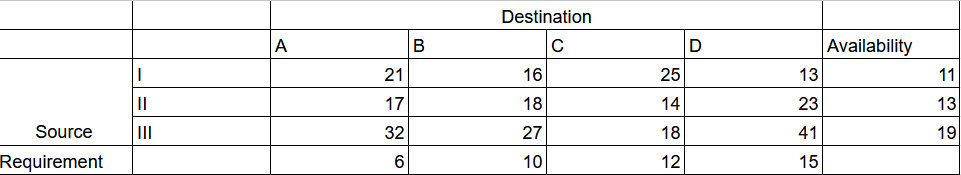

Using PuLP

In [ ]:
import pulp

# 1. Define the data
sources = ["I", "II", "III"]
destinations = ["A", "B", "C", "D"]

availability = {"I": 11, "II": 13, "III": 19}
requirement = {"A": 6, "B": 10, "C": 12, "D": 15}

costs = {
    "I":   {"A": 21, "B": 16, "C": 25, "D": 13},
    "II":  {"A": 17, "B": 18, "C": 14, "D": 23},
    "III": {"A": 32, "B": 27, "C": 18, "D": 41},
}

# 2. Create the LPP problem
prob = pulp.LpProblem("TransportationProblem", pulp.LpMinimize)

# 3. Create decision variables
routes = [(s, d) for s in sources for d in destinations]
x = pulp.LpVariable.dicts("Route", (sources, destinations), 0, None, pulp.LpInteger)

# 4. Define the Objective Function
prob += pulp.lpSum([x[s][d] * costs[s][d] for s in sources for d in destinations]), "Total_Cost"

# 5. Define the Constraints
# Supply Constraints
for s in sources:
    prob += pulp.lpSum([x[s][d] for d in destinations]) == availability[s], f"Supply_{s}"

# Demand Constraints
for d in destinations:
    prob += pulp.lpSum([x[s][d] for s in sources]) == requirement[d], f"Demand_{d}"

# 6. Solve the problem
prob.solve()

# 7. Print the results
print(f"Status: {pulp.LpStatus[prob.status]}")
print(f"Total Optimal Cost = {pulp.value(prob.objective)}")
print("\nOptimal Shipping Plan:")
for s in sources:
    for d in destinations:
        if x[s][d].varValue > 0:
            print(f"  Ship {int(x[s][d].varValue)} units from Source {s} to Destination {d}")

Status: Optimal
Total Optimal Cost = 796.0

Optimal Shipping Plan:
  Ship 11 units from Source I to Destination D
  Ship 6 units from Source II to Destination A
  Ship 3 units from Source II to Destination B
  Ship 4 units from Source II to Destination D
  Ship 7 units from Source III to Destination B
  Ship 12 units from Source III to Destination C


In [ ]:
routes = [(s, d) for s in sources for d in destinations]
print(routes)

[('I', 'A'), ('I', 'B'), ('I', 'C'), ('I', 'D'), ('II', 'A'), ('II', 'B'), ('II', 'C'), ('II', 'D'), ('III', 'A'), ('III', 'B'), ('III', 'C'), ('III', 'D')]


In [ ]:
# Re-run the transportation LP solve (state was reset previously).

import numpy as np
from scipy.optimize import linprog

sources = ["I", "II", "III"]
destinations = ["A", "B", "C", "D"]
supply = np.array([11, 13, 19], dtype=float)
demand = np.array([6, 10, 12, 15], dtype=float)
cost = np.array([[21, 16, 25, 13],
                 [17, 18, 14, 23],
                 [32, 27, 18, 41]], dtype=float)

m, n = len(sources), len(destinations)
c = cost.flatten()

A_eq = []
b_eq = []

# Supply constraints
for i in range(m):
    row = np.zeros(m*n)
    for j in range(n):
        row[i*n + j] = 1.0
    A_eq.append(row)
    b_eq.append(supply[i])

# Demand constraints
for j in range(n):
    row = np.zeros(m*n)
    for i in range(m):
        row[i*n + j] = 1.0
    A_eq.append(row)
    b_eq.append(demand[j])

A_eq = np.vstack(A_eq)
b_eq = np.array(b_eq)

bounds = [(0, None)] * (m*n)

res = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method="highs")

print("Status:", res.message)
print("Optimal total cost:", res.fun)

# Format the plan
x = res.x.reshape(m, n)
for i, s in enumerate(sources):
    row = ", ".join(f"{destinations[j]}={x[i,j]:.2f}" for j in range(n))
    print(f"{s}: {row}")


Status: Optimization terminated successfully. (HiGHS Status 7: Optimal)
Optimal total cost: 796.0
I: A=0.00, B=0.00, C=0.00, D=11.00
II: A=6.00, B=3.00, C=0.00, D=4.00
III: A=0.00, B=7.00, C=12.00, D=0.00


One can also write their onw VAM and MODI. I used chatGPT to create code for this

In [ ]:
# Vogel’s Approximation Method (VAM) + MODI (u–v) for the given transportation problem
# Sources: I, II, III supplies [11, 13, 19]
# Destinations: A, B, C, D demands [6, 10, 12, 15]
# Costs:
#       A   B   C   D
# I   [21, 16, 25, 13]
# II  [17, 18, 14, 23]
# III [32, 27, 18, 41]

import numpy as np
import pandas as pd
from collections import deque
from itertools import product

sources = ["I", "II", "III"]
dests = ["A", "B", "C", "D"]
supply = [11, 13, 19]
demand = [6, 10, 12, 15]
cost = np.array([[21,16,25,13],
                 [17,18,14,23],
                 [32,27,18,41]], dtype=float)

m, n = len(sources), len(dests)

def vogel_approximation(cost, supply, demand):
    supply = supply.copy()
    demand = demand.copy()
    active_rows = [True]*m
    active_cols = [True]*n
    alloc = np.zeros_like(cost)
    steps = []

    def penalties(axis='row'):
        # returns list of (index, penalty, min_cost_index, min_cost) for active rows/cols
        result = []
        if axis=='row':
            for i in range(m):
                if not active_rows[i]:
                    continue
                costs = [cost[i,j] for j in range(n) if active_cols[j]]
                js = [j for j in range(n) if active_cols[j]]
                if len(costs)==1:
                    p = costs[0]  # difference to +inf ~ single available
                    minj = js[0]
                else:
                    two = sorted(zip(costs, js))[:2]
                    p = two[1][0] - two[0][0]
                    minj = two[0][1]
                result.append(('row', i, p, minj, cost[i,minj]))
        else:
            for j in range(n):
                if not active_cols[j]:
                    continue
                costs = [cost[i,j] for i in range(m) if active_rows[i]]
                is_ = [i for i in range(m) if active_rows[i]]
                if len(costs)==1:
                    p = costs[0]
                    mini = is_[0]
                else:
                    two = sorted(zip(costs, is_))[:2]
                    p = two[1][0] - two[0][0]
                    mini = two[0][1]
                result.append(('col', j, p, mini, cost[mini,j]))
        return result

    while any(active_rows) and any(active_cols):
        row_p = penalties('row')
        col_p = penalties('col')
        # choose maximum penalty; tie-breaker: smaller cost at min cell
        candidate = max(row_p + col_p, key=lambda x: (x[2], -x[4]))  # Actually we want max penalty; to break ties choose min cost
        # Correct: maximize penalty; then pick the min cost within that row/col
        # Rewrite selection properly:
        allc = row_p + col_p
        max_pen = max(x[2] for x in allc)
        # Among those, choose the one with the *smallest* min cost cell
        pool = [x for x in allc if x[2]==max_pen]
        candidate = min(pool, key=lambda x: x[4])

        if candidate[0]=='row':
            i = candidate[1]
            # pick column with minimum cost among active cols
            js = [j for j in range(n) if active_cols[j]]
            j = min(js, key=lambda j: cost[i,j])
        else:
            j = candidate[1]
            is_ = [i for i in range(m) if active_rows[i]]
            i = min(is_, key=lambda i: cost[i,j])

        qty = min(supply[i], demand[j])
        alloc[i,j] = qty
        supply[i] -= qty
        demand[j] -= qty

        steps.append({
            "choose": f"{sources[i]}→{dests[j]}",
            "allocated": qty,
            "cell_cost": cost[i,j],
            "remaining_supply": supply.copy(),
            "remaining_demand": demand.copy()
        })

        if supply[i]==0 and demand[j]==0:
            # degeneracy handling: close one and leave a zero allocation in the other with a very small epsilon if needed
            # here we'll close the row and keep the column active (standard trick)
            active_rows[i] = False
            # leave column active with zero remaining demand to be closed in next iteration
            demand[j] = 0
            active_cols[j] = False
        elif supply[i]==0:
            active_rows[i]=False
        elif demand[j]==0:
            active_cols[j]=False

    return alloc, steps

alloc_vam, vam_steps = vogel_approximation(cost, supply, demand)

# Build a readable table for VAM result
vam_table = pd.DataFrame(alloc_vam, index=sources, columns=dests)
total_cost_vam = float((alloc_vam * cost).sum())

# ============ MODI (u–v method) ============

def modi_optimize(cost, alloc):
    m, n = cost.shape
    # positions of basic variables (alloc>0); ensure non-degeneracy
    basics = {(i,j) for i in range(m) for j in range(n) if alloc[i,j] > 0}
    # If number of basics < m+n-1, add zero-alloc basics using least cost cells not already basic
    while len(basics) < m + n - 1:
        # choose a zero cell with minimal cost not already basic
        zeros = [(cost[i,j], i, j) for i in range(m) for j in range(n) if (i,j) not in basics]
        _, i, j = min(zeros)
        basics.add((i,j))

    def compute_uv(basics):
        u = [None]*m
        v = [None]*n
        u[0] = 0.0
        # BFS over equations c_ij = u_i + v_j
        q = deque([('u',0)])
        while q:
            typ, idx = q.popleft()
            if typ=='u':
                i = idx
                for j in range(n):
                    if (i,j) in basics and v[j] is None:
                        v[j] = cost[i,j] - u[i]
                        q.append(('v', j))
            else:
                j = idx
                for i in range(m):
                    if (i,j) in basics and u[i] is None:
                        u[i] = cost[i,j] - v[j]
                        q.append(('u', i))
        return u, v

    def opportunity(u, v):
        delta = np.full_like(cost, np.nan, dtype=float)
        for i in range(m):
            for j in range(n):
                if (i,j) not in basics:
                    delta[i,j] = cost[i,j] - (u[i] + v[j])
        return delta

    history = []
    while True:
        u, v = compute_uv(basics)
        delta = opportunity(u, v)
        # Check optimality (all deltas >= 0)
        min_delta = np.nanmin(delta)
        history.append((u, v, delta.copy(), min_delta))
        if min_delta >= -1e-9:
            break

        # Choose entering cell with most negative delta
        i0, j0 = np.unravel_index(np.nanargmin(delta), delta.shape)

        # Build a closed loop (alternating +/-) starting from (i0,j0)
        # Find a cycle using DFS restricted to basics sharing row/col
        def find_cycle(start):
            # Graph nodes are cells; edges connect if same row or same col and the other is basic
            # We need even-length cycle alternating rows/cols, ending back at start
            stack = [(start, [start])]
            visited = set()
            while stack:
                (i, j), path = stack.pop()
                # Explore same row
                for jj in range(n):
                    if jj == j: continue
                    cell = (i, jj)
                    if cell in basics or cell == start:
                        if cell == start and len(path) >= 4 and len(path)%2==0:
                            return path
                        if cell not in path:
                            # now move by column from this cell
                            for ii in range(m):
                                if ii == i: continue
                                cell2 = (ii, jj)
                                if cell2 in basics and cell2 not in path:
                                    stack.append((cell2, path + [cell, cell2]))
                # Explore same column
                for ii in range(m):
                    if ii == i: continue
                    cell = (ii, j)
                    if cell in basics or cell == start:
                        if cell == start and len(path) >= 4 and len(path)%2==0:
                            return path
                        if cell not in path:
                            for jj in range(n):
                                if jj == j: continue
                                cell2 = (ii, jj)
                                if cell2 in basics and cell2 not in path:
                                    stack.append((cell2, path + [cell, cell2]))
            return None

        cycle = find_cycle((i0, j0))
        if cycle is None:
            raise RuntimeError("Failed to find MODI cycle")

        # Determine theta = min allocation on '-' positions (every alternate starting at second)
        minus_positions = cycle[1::2]
        theta = min(alloc[i,j] for (i,j) in minus_positions)

        # Update allocations along the cycle: + at even indices, - at odd
        add = True
        for (i,j) in cycle:
            if add:
                alloc[i,j] += theta
                basics.add((i,j))
            else:
                alloc[i,j] -= theta
                if alloc[i,j] <= 1e-12:
                    alloc[i,j] = 0.0
                    if (i,j) in basics:
                        basics.remove((i,j))
            add = not add

    return alloc, history

alloc = alloc_vam.copy()
alloc_opt, modi_hist = modi_optimize(cost, alloc)

vam_df = pd.DataFrame(alloc_vam, index=sources, columns=dests)
opt_df = pd.DataFrame(alloc_opt, index=sources, columns=dests)

total_cost_vam = float((alloc_vam*cost).sum())
total_cost_opt = float((alloc_opt*cost).sum())

vam_df, total_cost_vam, opt_df, total_cost_opt


(       A    B     C     D
 I    0.0  0.0   0.0  11.0
 II   6.0  3.0   0.0   4.0
 III  0.0  7.0  12.0   0.0,
 796.0,
        A    B     C     D
 I    0.0  0.0   0.0  11.0
 II   6.0  3.0   0.0   4.0
 III  0.0  7.0  12.0   0.0,
 796.0)

ORtools

In [ ]:
from ortools.graph.python import min_cost_flow

# 1. Instantiate a SimpleMinCostFlow solver.
solver = min_cost_flow.SimpleMinCostFlow()

# 2. Define the data.
costs = [
    [21, 16, 25, 13],
    [17, 18, 14, 23],
    [32, 27, 18, 41],
]
supplies = [11, 13, 19]
demands = [6, 10, 12, 15]

num_sources = len(supplies)
num_dests = len(demands)

# 3. Add arcs with costs and capacities.
for i in range(num_sources):
    for j in range(num_dests):

        solver.add_arc_with_capacity_and_unit_cost(
            i,                      # start_node (tail)
            num_sources + j,        # end_node (head)
            int(supplies[i]),       # capacity
            int(costs[i][j])        # unit_cost
        )

# 4. Add node supplies.
for i in range(num_sources):
    solver.set_node_supply(i, int(supplies[i]))

for j in range(num_dests):
    solver.set_node_supply(num_sources + j, int(-demands[j]))

# 5. Find the minimum cost flow.
status = solver.solve()

# 6. Print the results.
if status == solver.OPTIMAL:
    print(f"Status: Optimal")
    print(f"Total Optimal Cost = {solver.optimal_cost()}")
    print("\nOptimal Shipping Plan:")
    for i in range(solver.num_arcs()):
        flow = solver.flow(i)
        if flow > 0:
            source = solver.tail(i)
            destination = solver.head(i) - num_sources
            cost = solver.unit_cost(i)
            print(
                f"  Ship {flow} units from Source {source + 1}"
                f" to Destination {chr(ord('A') + destination)}"
                f" (Cost: {flow * cost})"
            )
else:
    print("There was an issue with the solver.")
    print(f"Status code: {status}")

Status: Optimal
Total Optimal Cost = 796

Optimal Shipping Plan:
  Ship 11 units from Source 1 to Destination D (Cost: 143)
  Ship 6 units from Source 2 to Destination A (Cost: 102)
  Ship 3 units from Source 2 to Destination B (Cost: 54)
  Ship 4 units from Source 2 to Destination D (Cost: 92)
  Ship 7 units from Source 3 to Destination B (Cost: 189)
  Ship 12 units from Source 3 to Destination C (Cost: 216)


CVxpy

In [ ]:
# pip install cvxpy
import cvxpy as cp
import numpy as np

# ---- Data ----
sources = ["I", "II", "III"]
dests   = ["A", "B", "C", "D"]

supply = np.array([11, 13, 19], dtype=float)          # I, II, III
demand = np.array([ 6, 10, 12, 15], dtype=float)      # A, B, C, D

cost = np.array([
    [21, 16, 25, 13],   # I
    [17, 18, 14, 23],   # II
    [32, 27, 18, 41],   # III
], dtype=float)

m, n = cost.shape

# ---- Variables ----
# x[i,j] = units shipped from source i to destination j
x = cp.Variable((m, n), nonneg=True)

# ---- Objective: minimize total transportation cost ----
objective = cp.Minimize(cp.sum(cp.multiply(cost, x)))

# ---- Constraints ----
constraints = []

# Each source ships exactly its supply
constraints += [cp.sum(x[i, :]) == supply[i] for i in range(m)]

# Each destination receives exactly its demand
constraints += [cp.sum(x[:, j]) == demand[j] for j in range(n)]

# ---- Solve ----
prob = cp.Problem(objective, constraints)
# Choose any LP solver you have; GLPK/ECOS/OSQP/HiGHS are common
prob.solve(solver=cp.GLPK)  # or: solver=cp.ECOS / cp.SCIPY / cp.HIGHS

# ---- Results ----
print("Status:", prob.status)
print("Optimal total cost:", prob.value)

x_opt = x.value
for i, s in enumerate(sources):
    row = ", ".join(f"{dests[j]}={x_opt[i,j]:.0f}" for j in range(n))
    print(f"{s}: {row}")

# Optional: verify feasibility
print("Row sums (supply used):", np.sum(x_opt, axis=1))
print("Col sums (demand met):", np.sum(x_opt, axis=0))


Status: optimal
Optimal total cost: 796.0
I: A=0, B=0, C=0, D=11
II: A=6, B=3, C=0, D=4
III: A=0, B=7, C=12, D=0
Row sums (supply used): [11. 13. 19.]
Col sums (demand met): [ 6. 10. 12. 15.]
